In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=37b8e6ebd6290d219d26793b30038dbb


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | beisfjord
Processing Record 3 of Set 1 | luanda
Processing Record 4 of Set 1 | saleaula
City not found. Skipping...
Processing Record 5 of Set 1 | coihaique
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | poum
Processing Record 13 of Set 1 | fort nelson
Processing Record 14 of Set 1 | jalu
Processing Record 15 of Set 1 | muzquiz
City not found. Skipping...
Processing Record 16 of Set 1 | zhigansk
Processing Record 17 of Set 1 | karratha
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 1 | castro
Process

City not found. Skipping...
Processing Record 41 of Set 4 | qaqortoq
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | tura
Processing Record 44 of Set 4 | harlingen
Processing Record 45 of Set 4 | luis correia
Processing Record 46 of Set 4 | bulgan
Processing Record 47 of Set 4 | nyurba
Processing Record 48 of Set 4 | batemans bay
Processing Record 49 of Set 4 | karamea
City not found. Skipping...
Processing Record 50 of Set 4 | waipawa
Processing Record 1 of Set 5 | aleksandrov gay
Processing Record 2 of Set 5 | port hardy
Processing Record 3 of Set 5 | aflu
City not found. Skipping...
Processing Record 4 of Set 5 | caravelas
Processing Record 5 of Set 5 | provideniya
Processing Record 6 of Set 5 | shelburne
Processing Record 7 of Set 5 | lavrentiya
Processing Record 8 of Set 5 | staryy nadym
Processing Record 9 of Set 5 | honningsvag
Processing Record 10 of Set 5 | haines junction
Processing Record 11 of Set 5 | rauma
Processing Record 12 of Set 5 | port eliza

Processing Record 26 of Set 8 | buraydah
Processing Record 27 of Set 8 | osoyoos
Processing Record 28 of Set 8 | jeremie
Processing Record 29 of Set 8 | leh
Processing Record 30 of Set 8 | bethel
Processing Record 31 of Set 8 | shache
Processing Record 32 of Set 8 | orbetello
Processing Record 33 of Set 8 | fethiye
Processing Record 34 of Set 8 | kavieng
Processing Record 35 of Set 8 | kosino
Processing Record 36 of Set 8 | kudahuvadhoo
Processing Record 37 of Set 8 | venado tuerto
Processing Record 38 of Set 8 | newtownards
Processing Record 39 of Set 8 | sinkat
City not found. Skipping...
Processing Record 40 of Set 8 | lancaster
Processing Record 41 of Set 8 | merauke
Processing Record 42 of Set 8 | brokopondo
Processing Record 43 of Set 8 | ternate
Processing Record 44 of Set 8 | jurm
Processing Record 45 of Set 8 | minervino murge
Processing Record 46 of Set 8 | geraldton
Processing Record 47 of Set 8 | laguna
Processing Record 48 of Set 8 | betare oya
Processing Record 49 of Set 

Processing Record 14 of Set 12 | tezu
Processing Record 15 of Set 12 | naryan-mar
Processing Record 16 of Set 12 | hirara
Processing Record 17 of Set 12 | tahoua
Processing Record 18 of Set 12 | nome
Processing Record 19 of Set 12 | peniche
Processing Record 20 of Set 12 | porto novo
Processing Record 21 of Set 12 | edson
Processing Record 22 of Set 12 | acari
Processing Record 23 of Set 12 | nuevo progreso
Processing Record 24 of Set 12 | constantine
Processing Record 25 of Set 12 | chokurdakh
Processing Record 26 of Set 12 | gboko
Processing Record 27 of Set 12 | gohpur
Processing Record 28 of Set 12 | roald
Processing Record 29 of Set 12 | pionerskiy
Processing Record 30 of Set 12 | mitchell
Processing Record 31 of Set 12 | auki
Processing Record 32 of Set 12 | okha
Processing Record 33 of Set 12 | soller
Processing Record 34 of Set 12 | berlevag
Processing Record 35 of Set 12 | gizo
Processing Record 36 of Set 12 | bonavista
Processing Record 37 of Set 12 | bathsheba
Processing Rec

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,81.52,75,51,17.29,MV,2021-11-28 20:00:38
1,Beisfjord,68.3751,17.5988,23.05,87,98,7.23,NO,2021-11-28 20:00:38
2,Luanda,-8.8368,13.2343,80.60,74,0,6.91,AO,2021-11-28 19:56:39
3,Coihaique,-45.5752,-72.0662,48.02,98,100,7.25,CL,2021-11-28 20:00:39
4,Rikitea,-23.1203,-134.9692,76.33,77,12,16.82,PF,2021-11-28 20:00:39
5,Bredasdorp,-34.5322,20.0403,63.72,79,16,7.47,ZA,2021-11-28 20:00:39
6,Qaanaaq,77.4840,-69.3632,-8.30,79,25,7.85,GL,2021-11-28 20:00:40
7,Ushuaia,-54.8000,-68.3000,47.62,67,36,10.96,AR,2021-11-28 20:00:06
8,Port Alfred,-33.5906,26.8910,66.25,80,8,7.87,ZA,2021-11-28 20:00:40
9,Hermanus,-34.4187,19.2345,64.36,83,62,8.59,ZA,2021-11-28 20:00:41


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [18]:
# Create the output file (CSV).
output_data_file = "weather_datacities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

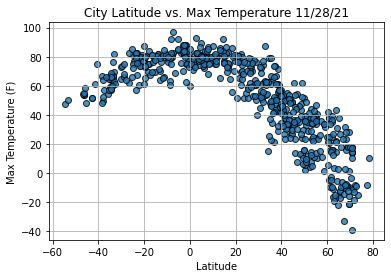

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

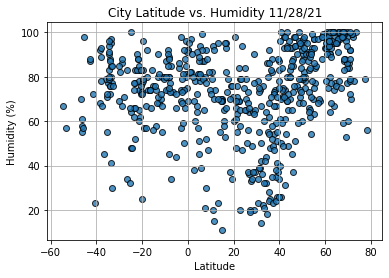

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

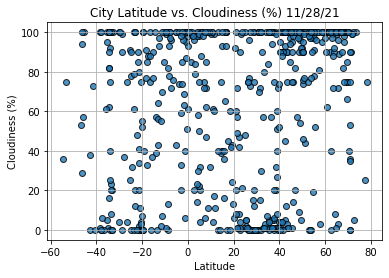

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

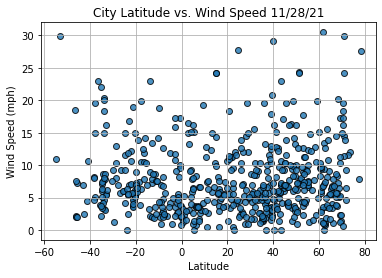

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()